<function create_lagrange_polynomial.<locals>.lagrange_polynomial at 0x000001C1FA4D1800>


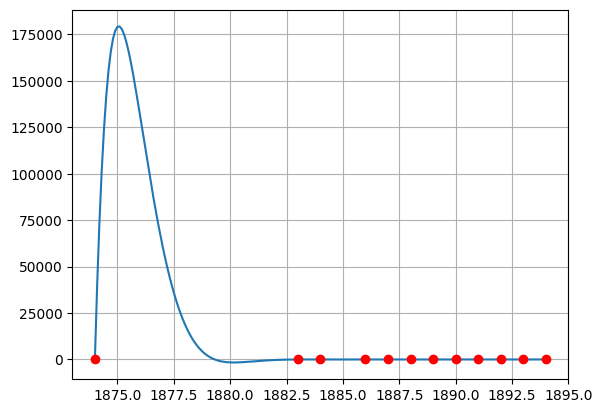

<function create_Newton_pol.<locals>.newton at 0x000001C1E154C0E0>
[1874.0, 1883.0, 1884.0, 1886.0, 1887.0, 1888.0] [-5.4, -8.0, -4.1, -10.3, -3.5, -12.0]


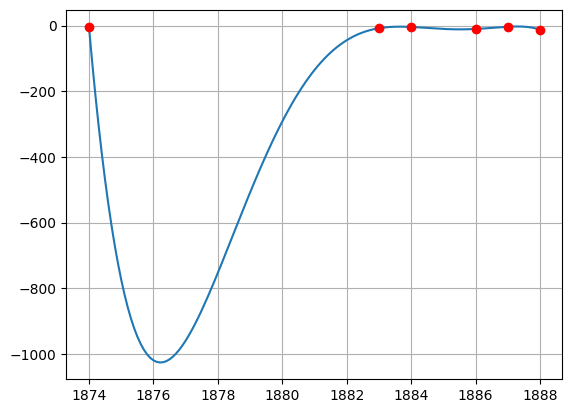

<function create_Newton_pol2.<locals>.newton2 at 0x000001C1FC78BE20>
[1874.0, 1883.0, 1884.0, 1886.0, 1887.0, 1888.0] [-5.4, -8.0, -4.1, -10.3, -3.5, -12.0]


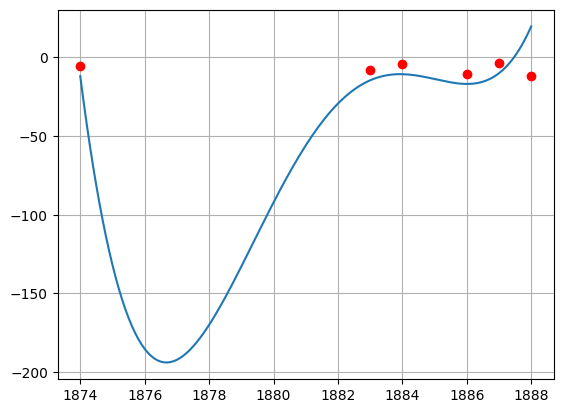

In [17]:
##1
import numpy as np
import matplotlib.pyplot as plt
A=np.loadtxt("14_Псков.csv",delimiter=",",skiprows=1)

## лагранж
def create_basic_polynomial(x_values, i):
    def basic_polynomial(x):
        divider = 1
        result  = 1
        for j in range(len(x_values)):          
            if j != i  :
                result  *= (x-x_values[j])
                divider *= (x_values[i]-x_values[j])
        return result/divider
    return basic_polynomial
def create_lagrange_polynomial(x_values, y_values):
    basic_polynomials = []
    for i in range(len(x_values)):
        basic_polynomials.append(create_basic_polynomial(x_values, i))

    def lagrange_polynomial(x):
        result = 0
        for i in range(len(y_values)):
            result += y_values[i]*basic_polynomials[i](x)
        return result
    return lagrange_polynomial

x_values = []
y_values = []



sum = 0
i = 0
while sum != 12:
    if(A[i][1]< 999.9):
        x_values.append(A[i][0])
        y_values.append(A[i][1])
        sum+=1
    i+=1
x=np.arange(x_values[0], x_values[sum-1]+0.1, 0.1)
lag_pol = create_lagrange_polynomial( x_values, y_values)
print(lag_pol)
plt.plot(x,lag_pol(x))
plt.plot(x_values,y_values, 'ro')
plt.grid()
plt.show()





#ньютон 1


def divided_differences(x_values, y_values, k):
    result = 0
    for j in range(k+1):
        mul = 1
        for i in range(k+1):
            if i != j:
                mul *= x_values[j] - x_values[i]
        result += y_values[j]/mul
    return result

def create_Newton_pol(x_values, y_values):
    div_diff = []
    for i in range(1, len(x_values)):
        div_diff.append(divided_differences(x_values, y_values, i))
    def newton(x):
        result = y_values[0]
        for k in range(1, len(y_values)):
            mul = 1
            for j in range(k):
                mul *= (x-x_values[j])
            result += div_diff[k-1]*mul
        return result
    return newton


x_values = []
y_values = []


sum = 0
i = 0
while sum != 6:
    if(A[i][2]< 999.9):
        x_values.append(A[i][0])
        y_values.append(A[i][2])
        sum+=1
    i+=1
x=np.arange(x_values[0], x_values[sum-1]+0.1, 0.1)
new_pol = create_Newton_pol(x_values, y_values)
print(new_pol)
plt.plot(x,new_pol(x))
x2_values=[]
y2_values=[]
for i in range (len(x_values)): 
    if y_values[i]<999.9:
        x2_values.append(x_values[i])
        y2_values.append(y_values[i])
print (x2_values,y2_values)
plt.plot(x2_values,y2_values, 'ro')
plt.grid()
plt.show()

##2 newton

def divided_differences2(x_values, y_values, k):
    result = 0
    for j in range(k, -1, -1):
        mul = 1
        for i in range(k, -1, -1):
            if i != j:
                mul *= x_values[j] - x_values[i]
        result += y_values[j]/mul
    return result

def create_Newton_pol2(x_values, y_values):
    div_diff = []
    for i in range(1, len(x_values)):
        div_diff.append(divided_differences(x_values, y_values, i))
    def newton2(x):
        result = y_values[len(y_values)-1]
        for k in range(len(y_values)-2, 0, -1):
            mul = 1
            for j in range(k):
                mul *= (x-x_values[j])
            result += div_diff[k-1]*mul
        return result
    return newton2


x_values = []
y_values = []


sum = 0
i = 0
while sum != 6:
    if(A[i][2]< 999.9):
        x_values.append(A[i][0])
        y_values.append(A[i][2])
        sum+=1
    i+=1
x=np.arange(x_values[0], x_values[sum-1]+0.1, 0.1)
new_pol2 = create_Newton_pol2(x_values, y_values)
print(new_pol2)
plt.plot(x,new_pol2(x))
x2_values=[]
y2_values=[]
for i in range (len(x_values)): 
    if y_values[i]<999.9:
        x2_values.append(x_values[i])
        y2_values.append(y_values[i])
print (x2_values,y2_values)
plt.plot(x2_values,y2_values, 'ro')
plt.grid()
plt.show()